# LA Mayor Candidate: Crime Analysis

In [2]:
%matplotlib notebook

In [3]:
#Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#Import files
crime_data_to_load= "../Resources/crime-data-from-2010-to-present.csv"

crime_data_df=pd.read_csv(crime_data_to_load)

crime_data_df.head()

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,...,Weapon Description,Status Code,Status Description,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4,Address,Cross Street,Location
0,102005556,2010-01-25T00:00:00,2010-01-22T00:00:00,2300,20,Olympic,2071,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,VAN NESS,15TH,"{'latitude': '34.0454', 'needs_recoding': Fals..."
1,101822289,2010-11-11T00:00:00,2010-11-10T00:00:00,1800,18,Southeast,1803,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,88TH,WALL,"{'latitude': '33.9572', 'needs_recoding': Fals..."
2,101105609,2010-01-28T00:00:00,2010-01-27T00:00:00,2230,11,Northeast,1125,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,YORK,AVENUE 51,"{'latitude': '34.1211', 'needs_recoding': Fals..."
3,101620051,2010-11-11T00:00:00,2010-11-07T00:00:00,1600,16,Foothill,1641,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,EL DORADO,TRUESDALE,"{'latitude': '34.241', 'needs_recoding': False..."
4,101910498,2010-04-07T00:00:00,2010-04-07T00:00:00,1600,19,Mission,1902,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,GLENOAKS,DRELL,"{'latitude': '34.3147', 'needs_recoding': Fals..."


# Summary Statistics 

In [5]:
#Total number of unique area names
area_name_count=len(crime_data_df["Area Name"].unique())
area_name_count

21

In [6]:
#Total number of Crime Code Description
crime_count=len(crime_data_df["Crime Code Description"].unique())
crime_count

140

In [7]:
#Find the most common geographical area name in LA County
most_common_area=crime_data_df["Area Name"].value_counts()
most_common_area.head(15)

77th Street    137513
Southwest      128111
N Hollywood    107707
Pacific        105655
Southeast      105104
Mission         98395
Northeast       94912
Van Nuys        94358
Newton          94123
Hollywood       92742
Topanga         92262
Devonshire      91347
Central         90489
Olympic         89634
Harbor          86972
Name: Area Name, dtype: int64

In [8]:
#What area name has the least committed amount of crimes?
least_common_area=crime_data_df["Area Name"].value_counts(ascending=True)
least_common_area.head(15)

Hollenbeck     73514
Foothill       75348
Wilshire       82575
West LA        83736
Rampart        84241
West Valley    84521
Harbor         86972
Olympic        89634
Central        90489
Devonshire     91347
Topanga        92262
Hollywood      92742
Newton         94123
Van Nuys       94358
Northeast      94912
Name: Area Name, dtype: int64

In [9]:
#Most common types of crimes and least type of crimes in LA County 
crime_code_count=crime_data_df['Crime Code'].value_counts(ascending=False)
crime_code_count

624    180434
330    153451
510    151622
440    141489
310    140926
        ...  
432         3
926         2
906         2
453         1
905         1
Name: Crime Code, Length: 140, dtype: int64

In [10]:
#Find the highest amount of homicides by Area Name
homicide_count=crime_data_df[crime_data_df['Crime Code']==110].groupby(['Area Name'])['DR Number'].count()
sorted_homicide=homicide_count.sort_values(ascending=False)
sorted_homicide

Area Name
77th Street    422
Southeast      363
Newton         229
Southwest      212
Hollenbeck     157
Harbor         156
Rampart        139
Mission        128
Foothill       111
Central         98
Northeast       86
Olympic         79
N Hollywood     76
Hollywood       66
Van Nuys        58
Wilshire        55
West Valley     52
Pacific         48
Devonshire      39
Topanga         36
West LA         24
Name: DR Number, dtype: int64

In [11]:
#Find the Crime Code occurring most in the highest crime area name
crime_max=crime_data_df.groupby(['Area Name'])[['Crime Code']].value_counts()
crime_max.head(15)

Area Name    Crime Code
77th Street  624           14497
             510           12255
             230           11127
             210            9725
             310            9254
             626            9242
             330            7199
             745            6613
             440            6478
             740            6294
             354            6094
             930            4659
             420            4580
             341            2522
             350            1705
dtype: int64

In [12]:
#Find the Crime Code occurring most in the lowest crime area name
lowest_crime_area=crime_data_df.loc[crime_data_df['Area Name'].str.contains('Hollenbeck')]
lowest_crime_area[["Area Name", "Crime Code"]].value_counts()

Area Name   Crime Code
Hollenbeck  510           9234
            624           7637
            440           4688
            330           4410
            740           4363
                          ... 
            822              1
            830              1
            924              1
            880              1
            472              1
Length: 123, dtype: int64

# Statistics of Victims' Age

In [13]:
#Diplay a data table of the mean, median, and SEM of crime offenders' age who committed homicide
mean=crime_data_df['Victim Age'].groupby(crime_data_df['Area Name']).mean()
median=crime_data_df['Victim Age'].groupby(crime_data_df['Area Name']).median()
std=crime_data_df['Victim Age'].groupby(crime_data_df['Area Name']).std()
sem=crime_data_df['Victim Age'].groupby(crime_data_df['Area Name']).sem()


summary_stat=pd.DataFrame({"Mean of Victim Age":mean,
                          "Median of Victim Age":median,
                           "Standard Deviation of Victim Age": std,
                          "Victim Age Standard Error":sem})
summary_stat

,Mean of Victim Age,Median of Victim Age,Standard Deviation of Victim Age,Victim Age Standard Error
Area Name,,,,
77th Street,31.594264,31.0,19.847169,0.053521
Central,34.387937,34.0,18.313658,0.060880
Devonshire,33.869388,34.0,22.390451,0.074083
Foothill,31.350666,31.0,20.994190,0.076483
Harbor,30.279872,31.0,22.075137,0.074854
Hollenbeck,27.200397,27.0,21.410971,0.078968
Hollywood,29.643117,29.0,19.248098,0.063205
Mission,29.961075,30.0,20.479871,0.065289
N Hollywood,31.773088,32.0,20.716234,0.063123


In [14]:
#Display a data table of the mean, median, std, sem of Victim Age by Crime Code
mean=crime_data_df['Victim Age'].groupby(crime_data_df['Crime Code']).mean()
median=crime_data_df['Victim Age'].groupby(crime_data_df['Crime Code']).median()
std=crime_data_df['Victim Age'].groupby(crime_data_df['Crime Code']).std()
sem=crime_data_df['Victim Age'].groupby(crime_data_df['Crime Code']).sem()

summary_stat=pd.DataFrame({"Mean of Victim Age":mean,
                          "Median of Victim Age":median,
                           "Standard Deviation of Victim Age": std,
                          "Victim Age Standard Error":sem})
summary_stat.head(20)

,Mean of Victim Age,Median of Victim Age,Standard Deviation of Victim Age,Victim Age Standard Error
Crime Code,,,,
110,33.212604,30.0,14.983000,0.291938
113,14.000000,11.0,14.508618,6.488451
121,26.649797,23.0,12.878236,0.131554
122,30.602294,27.0,14.294662,0.441986
210,30.988739,29.0,18.201789,0.064599
220,32.548191,31.0,17.625041,0.165357
230,33.955004,31.0,15.541146,0.052741
231,9.570039,0.0,16.360910,0.416644
235,8.180485,8.0,6.380406,0.161130


In [15]:
# Create an empty dictionary to store the results
victim_age_ranges = {'Victim Age Range': ['Ages 30 and under', 'Ages 31-59', 'Ages 60 and over'],
                     'Count': [0, 0, 0]}

# Create a dataframe from the dictionary
victim_age_ranges_df = pd.DataFrame(victim_age_ranges)

# Count the number of crimes where the victim's age is 30 and under
victim_age_ranges_df.loc[victim_age_ranges_df['Victim Age Range'] == 'Ages 30 and under', 'Count'] = \
    crime_data_df[crime_data_df['Victim Age'] <= 30]['DR Number'].count()

# Count the number of crimes where the victim's age is between 31 and 59
victim_age_ranges_df.loc[victim_age_ranges_df['Victim Age Range'] == 'Ages 31-59', 'Count'] = \
    crime_data_df[(crime_data_df['Victim Age'] > 30) & (crime_data_df['Victim Age'] <= 59)]['DR Number'].count()

# Count the number of crimes where the victim's age is 60 and over
victim_age_ranges_df.loc[victim_age_ranges_df['Victim Age Range'] == 'Ages 60 and over', 'Count'] = \
    crime_data_df[crime_data_df['Victim Age'] >= 60]['DR Number'].count()

victim_age_ranges_df

,Victim Age Range,Count
0,Ages 30 and under,953833
1,Ages 31-59,859962
2,Ages 60 and over,179464


<IPython.core.display.Javascript object>


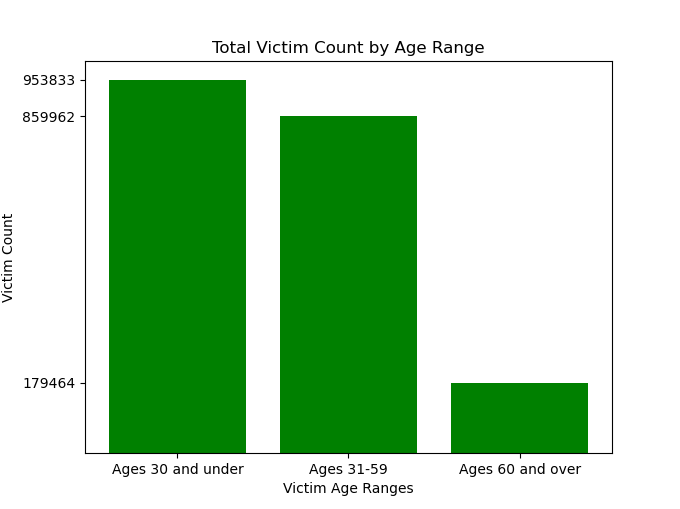

([<matplotlib.axis.YTick at 0x1779c3919d0>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

In [17]:
ranges=victim_age_ranges_df['Victim Age Range']
count_total= [953833, 859962, 179464]
x_axis= np.arange(len(ranges))
plt.bar(ranges, count_total, color='g', align='center')
plt.title("Total Victim Count by Age Range")
plt.ylabel("Victim Count")
plt.xlabel("Victim Age Ranges")
plt.yticks(count_total)

<IPython.core.display.Javascript object>


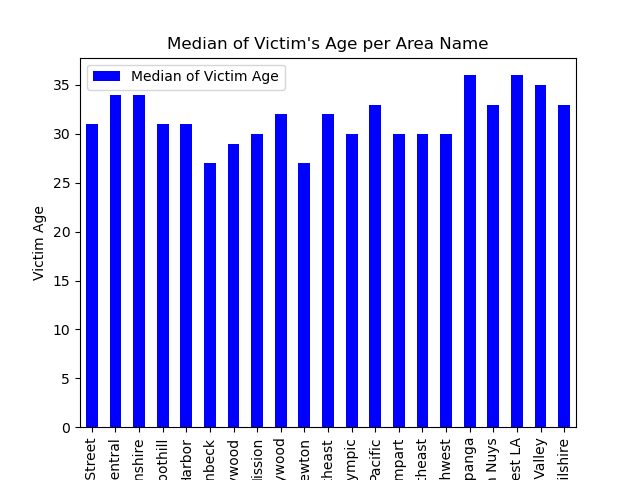

Text(0.5, 1.0, "Median of Victim's Age per Area Name")

In [81]:
#Display bar graph of the Median of Victim Age
median=crime_data_df['Victim Age'].groupby(crime_data_df['Area Name']).median()
median_stat=pd.DataFrame({"Median of Victim Age":median})

plot_pandas=median_stat.plot.bar(color='b')
plt.xlabel("Area Name")
plt.ylabel("Victim Age")
plt.title("Median of Victim's Age per Area Name")

<IPython.core.display.Javascript object>


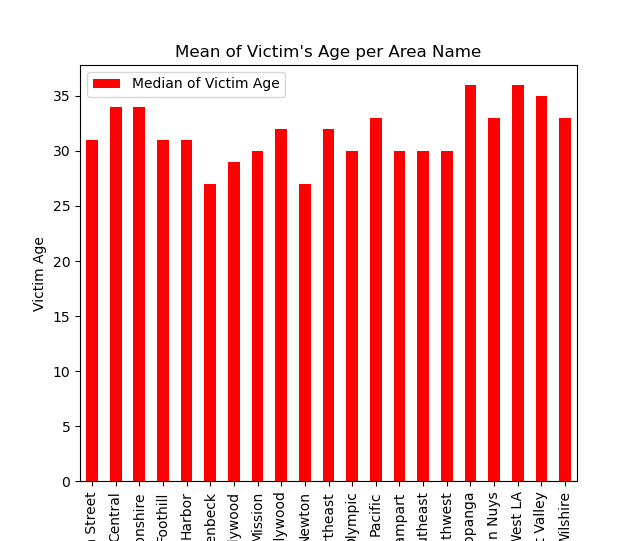

Text(0.5, 1.0, "Mean of Victim's Age per Area Name")

In [97]:
#Display bar graph of the Mean of Victim Age
mean=crime_data_df['Victim Age'].groupby(crime_data_df['Area Name']).mean()
mean_stat=pd.DataFrame({"Median of Victim Age":median})

plot_pandas=mean_stat.plot.bar(color='r')
plt.xlabel("Area Name")
plt.ylabel("Victim Age")
plt.title("Mean of Victim's Age per Area Name")

# Gender Distribution

In [83]:
#Provide a dataset of the crimes committed by men vs women 
gender_data_df=crime_data_df["Victim Sex"].value_counts()
gender_data_df

M    920405
F    840397
X     46409
H        70
N        17
-         1
Name: Victim Sex, dtype: int64

In [84]:
#Rename Gender Columns, Combine X, H, N
crime_data_df.loc[crime_data_df["Victim Sex"].isin(["X", "H", "N"]),"Victim Sex"]= "Other"

gender_data_df=crime_data_df["Victim Sex"].value_counts()

new_gender_data_df=gender_data_df.rename({"M":"Male", "F":"Female"
                                                 })
#Drop "-" Column 
del new_gender_data_df["-"]
new_gender_data_df

Male      920405
Female    840397
Other      46496
Name: Victim Sex, dtype: int64

<IPython.core.display.Javascript object>


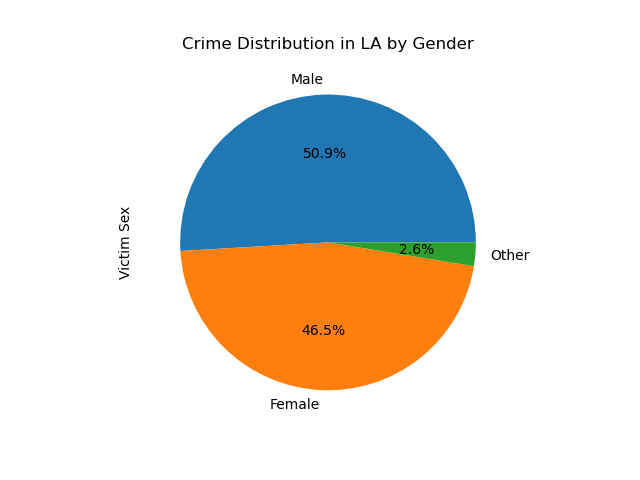

In [88]:
#Generate a pie chart showing the distribution of male vs. female vs. other 
pie_chart=new_gender_data_df
pie_chart.plot.pie(autopct= "%1.1f%%")
plt.title('Crime Distribution in LA by Gender')
plt.show()

In [86]:
#Display a data table of Gender Count by Area Name
area_by_sex=crime_data_df['Victim Sex'].groupby(crime_data_df['Area Name']).value_counts()
area_gender_mean=crime_data_df['Victim Sex'].groupby(crime_data_df['Area Name'])
gender_data=pd.DataFrame({"Gender Count by Area Name": area_by_sex})
gender_data.head(20)

Gender Count by Area Name
Area Name   Victim Sex                           
77th Street F                               68019
            M                               53093
            Other                            1945
Central     M                               51456
            F                               33987
            Other                            1142
Devonshire  M                               42308
            F                               37091
            Other                            4679
Foothill    M                               35197
            F                               30829
            Other                              78
Harbor      M                               37569
            F                               35148
            Other                            3598
Hollenbeck  M                               30611
            F                               29549
            Other                            2471
Hollywood   M                               47937
            F                               33467